## Reading a so6 file

In [1]:
# Reading a zipped file (with libarchive)
from traffic.so6 import SO6
so6 = SO6.parse_file("../data/20180101_20180101_0000_2359_____m3.so6.7z")

# Serialize 
so6.to_pkl("../data/20180101_20180101_0000_2359_____m3.pkl")

In [2]:
# Read the serialized version
from traffic.so6 import SO6
so6 = SO6.parse_file("../data/20180101_20180101_0000_2359_____m3.pkl")

HOP36PP {332206265}:
 LFML (2018-01-01 19:15:40) → LFBD (2018-01-01 19:58:00)


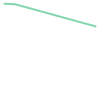

In [4]:
# Access a flight with brackets (and completion)
so6['HOP36PP']

HOP36PP {332206265}:
 LFML (2018-01-01 19:15:40) → LFBD (2018-01-01 19:58:00)


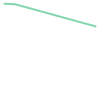

In [5]:
# Access with unique id
so6[332206265]

In [42]:
# A pandas DataFrame is hidden behind
so6['HOP36PP'].data.head()

,origin,destination,aircraft,alt1,alt2,callsign,lat1,lon1,lat2,lon2,flight_id,time1,time2
74519,LFML,LFBD,A319,21800,17700,HOP36PP,43.608398,4.527325,44.723806,0.474422,332206265,2018-01-01 19:15:40,2018-01-01 19:52:00
74520,LFML,LFBD,A319,17700,9500,HOP36PP,44.723806,0.474422,44.751343,-0.091422,332206265,2018-01-01 19:52:00,2018-01-01 19:58:00


In [8]:
# Does the aircraft fly through the sector?
from traffic.data import sectors
so6['HOP36PP'].intersects(sectors['LFBBBDX'])

True

HOP36PP {332206265}:
 LFML (2018-01-01 19:20:28.471689) → LFBD (2018-01-01 19:58:00)


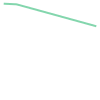

In [9]:
# Clip the flight on the 2D polygon of the sector
so6['HOP36PP'].clip(sectors['LFBBBDX'].flatten())

## Interpolation and temporal filtering

In [10]:
# Interpolation at a given date (str (UTC), int (timestamp) or datetime)
so6['HOP36PP'].at("2018/01/01 18:40")

array([[  1.81299543e+00,   4.43554142e+01,   1.90541284e+04]])

In [16]:
# Interpolation inside a given interval
so6['HOP36PP'].between("2018/01/01 18:25", "2018/01/01 18:55").data

,lon1,lat1,alt1,lon2,lat2,alt2,aircraft,callsign,destination,flight_id,origin,time1,time2
0,3.486212,43.894925,20746.788991,0.474422,44.723806,17700.0,A319,HOP36PP,LFBD,332206265,LFML,2018-01-01 19:25:00,2018-01-01 19:52:00
1,0.474422,44.723806,17700.000000,0.191500,44.737574,13600.0,A319,HOP36PP,LFBD,332206265,LFML,2018-01-01 19:52:00,2018-01-01 19:55:00


In [17]:
# also with timedelta
from datetime import timedelta
so6['HOP36PP'].between("2018/01/01 18:25", timedelta(minutes=30)).data

,lon1,lat1,alt1,lon2,lat2,alt2,aircraft,callsign,destination,flight_id,origin,time1,time2
0,3.486212,43.894925,20746.788991,0.474422,44.723806,17700.0,A319,HOP36PP,LFBD,332206265,LFML,2018-01-01 19:25:00,2018-01-01 19:52:00
1,0.474422,44.723806,17700.000000,0.191500,44.737574,13600.0,A319,HOP36PP,LFBD,332206265,LFML,2018-01-01 19:52:00,2018-01-01 19:55:00


In [18]:
# intersection within a time interval
so6['HOP36PP'].between("2018/01/01 18:25", timedelta(minutes=30)).intersects(sectors['LFBBBDX'])

True

In [21]:
# The flight entered the sector earlier
so6['HOP36PP'].between("2018/01/01 18:15", timedelta(minutes=5)).intersects(sectors['LFBBBDX'])

False

## Spatial filtering

In [22]:
# Number of flights
len(so6)

11043

In [23]:
%%time
# First, filter inside the bounding box (faster than polygon check)
bdx_so6 = so6.inside_bbox(sectors["LFBBBDX"])

CPU times: user 7.51 s, sys: 3.31 ms, total: 7.52 s
Wall time: 7.53 s


In [24]:
len(bdx_so6)

1562

In [34]:
%%time
noon = so6.at("2018/01/01 12:00")

CPU times: user 19.1 ms, sys: 0 ns, total: 19.1 ms
Wall time: 16.2 ms


In [35]:
%%time
# usually faster, but not necessarily safe on small sectors...
bdx_flights = noon.inside_bbox(sectors['LFBBBDX']).intersects(sectors['LFBBBDX'])

CPU times: user 1.64 s, sys: 7.72 ms, total: 1.65 s
Wall time: 1.64 s


## Misc.

In [36]:
# Check a callsign is inside a so6
'HOP32SS' in so6.callsigns

False

In [37]:
# Number of lines per flight
len(so6['HOP36PP'])

2

In [39]:
so6['HOP12VY'].coords

<generator object coords at 0x7f2636628410>

In [40]:
# Advanced: get coordinates (also LineString)
import numpy as np
np.stack(so6['HOP12VY'].coords)[:5, :]

array([[  1.59301758e-01,   4.35558099e+01,   1.18000000e+04],
       [  9.41047668e-01,   4.69243011e+01,   2.91000000e+04],
       [  1.09194242e+00,   4.72489386e+01,   2.61000000e+04],
       [  1.56757556e+00,   4.82150372e+01,   1.12000000e+04],
       [  1.63485014e+00,   4.82876587e+01,   1.09000000e+04]])

In [43]:
# also LineString (but no altitude :())
so6['HOP12VY'].linestring.xy

(array('d', [0.15930175781199998, 0.9410476684569999, 1.09194242037, 1.5675755551000001, 1.6348501352200002, 1.86422494742, 1.9026770958499999, 2.3891649748100003, 2.80042949476, 2.82789531507, 2.8312201248999997, 2.6234917891700005]),
 array('d', [43.555809926200006, 46.9243011475, 47.248938609, 48.215037200400005, 48.287658691400004, 48.51063537600001, 48.529541015599996, 48.566273834700006, 48.6719939668, 48.6932683395, 48.7238531598, 48.754251771099995]))

In [41]:
# Get timestamps
np.stack(so6['HOP12VY'].times)[:5]

array([Timestamp('2018-01-01 11:25:10'), Timestamp('2018-01-01 11:57:20'),
       Timestamp('2018-01-01 12:00:20'), Timestamp('2018-01-01 12:10:00'),
       Timestamp('2018-01-01 12:10:50')], dtype=object)